<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_df=pd.read_csv(boston_url)

# Se creó la columna "grupo_edad" para determina los rangos de edad.
boston_df["age_group"] = ['<=35' if AGE <= 35 else '>35&<=70' if AGE > 35 and AGE <= 70 else '>70' for AGE in boston_df["AGE"]]

# Tarea 2: Generar estadísticas descriptivas y visualizaciones

##### Diagrama de caja para el "Valor medio de las viviendas ocupadas por sus propietarios"

Text(0.5, 0, 'Valor medio de las viviendas')

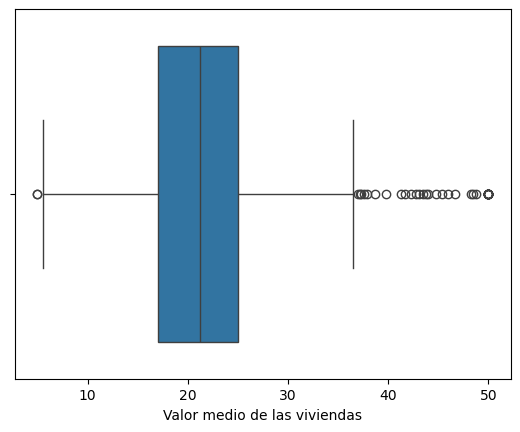

In [3]:
sns.boxplot(x = boston_df['MEDV'])
plt.xlabel("Valor medio de las viviendas")

##### Diagrama de barras para la variable "río Charles"

Text(0, 0.5, 'VOLUMEN')

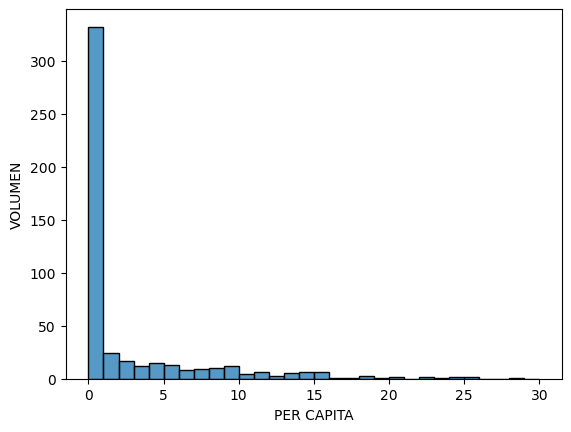

In [4]:
sns.histplot(data = boston_df['CRIM'], binwidth = 1, binrange = [0,30])
plt.xlabel("PER CAPITA")
plt.ylabel("VOLUMEN")

##### Boxplot para la variable MEDV frente a la variable EDAD. (rango de edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

Text(0, 0.5, '')

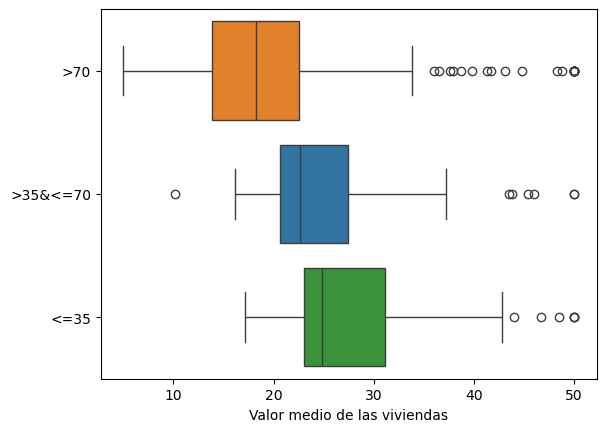

In [5]:
sns.boxplot(x = boston_df["MEDV"], y = boston_df["age_group"], hue = boston_df["age_group"], order = ['>70','>35&<=70','<=35'])
plt.xlabel("Valor medio de las viviendas")
plt.ylabel("")

##### Diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

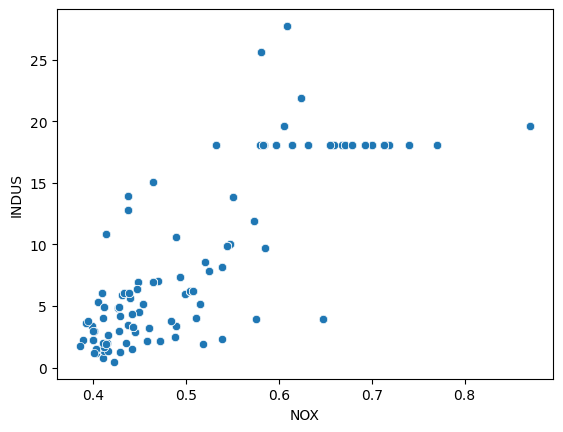

In [6]:
sns.scatterplot(x = boston_df["NOX"], y = boston_df["INDUS"])

##### Histograma para la variable proporción de alumnos por profesor

Text(0, 0.5, '')

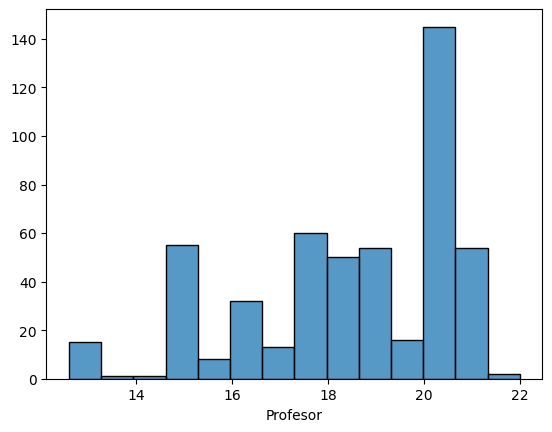

In [18]:
sns.histplot(x = boston_df["PTRATIO"])
plt.xlabel("Profesor")
plt.ylabel("")

# Tarea 3: Utilice las pruebas adecuadas para responder a las preguntas que se le plantean

##### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no?



Ahora queremos saber si hay una diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE). Necesitamos realizar un Análisis de Varianza, así que establezcamos nuestra hipótesis:

* H_0 : u_0 = u_1 (no hay diferencia en el valor medio de las casas delimitadas)
* H_1 : u_0 ≠ u_2 (hay una diferencia en el valor medio de las casas delimitadas)
  
Prueba de Levene para verificar la importancia de la prueba:

In [8]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

El valor p es menor que 0.05 y por tanto las varianzas de ambos grupos no son iguales.

Usemos esta información para realizar una prueba T asumiendo varianzas desiguales:

In [9]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

El valor p es inferior a 0.05, por lo que podemos rechazar nuestra hipótesis nula y concluir que existe una diferencia significativa en el valor mediano de las casas.

ANOVA:
Ahora queremos saber si hay una diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).

Usemos la columna "grupo_edad" que creamos en la sección "bibliotecas y marcos de datos" de este cuaderno para agrupar los datos en tres grupos.

Necesitamos realizar un Análisis de Varianza, así que establezcamos nuestra hipótesis:

* H_0 : u_0 = u_1 = u2 (las tres medias poblacionales son iguales)
* H_1 : al menos una media poblacional no es igual

Realicemos la prueba de igualdad de varianza mediante la prueba de Levene:

In [10]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '<=35']['MEDV'],
                   boston_df[boston_df['age_group'] == '>35&<=70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '>70']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

En este caso, nuestro valor p es mayor que 0.05 y, entonces, las varianzas de los tres grupos son iguales, por lo que podemos proceder con una prueba ANOVA unidireccional.

Separamos las tres muestras en una variable diferente cada una:

In [12]:
under_35  = boston_df[boston_df['age_group'] == '<=35']['MEDV']
bet_35_70 = boston_df[boston_df['age_group'] == '>35&<=70']['MEDV']
over_70   = boston_df[boston_df['age_group'] == '>70']['MEDV']

Ahora, ejecutemos una ANOVA unidireccional:

In [13]:
f_statistic, p_value = scipy.stats.f_oneway(under_35, bet_35_70, over_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusión: 
Debido a que el valor p es inferior a 0.05, rechazaremos la hipótesis nula ya que existe evidencia significativa de que al menos una de las medias difiere.

CORRELACIÓN DE PEARSON
Para esta parte necesitamos realizar una correlación de Pearson entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

Nuestra hipótesis es:

* H0 : La concentración de óxido nítrico no está correlacionada con la proporción de acres comerciales no minoristas por ciudad.
* H1 : La concentración de óxido nítrico está correlacionada con la proporción de acres de negocios no minoristas por ciudad.

Dado que ambas son variables continuas, podemos utilizar una prueba de correlación de Pearson:

In [14]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Conclusión: 
Dado que el valor p < 0.05, ahora podemos rechazar la hipótesis nula y podemos concluir con confianza que tenemos evidencia suficiente de una relación entre la concentración de óxido nítrico y la proporción de acres de negocios no minoristas por ciudad.

ANÁLISIS DE REGRESIÓN
Queremos encontrar el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios, por lo que desarrollaremos un análisis de regresión.

Primero, nuestra Hipótesis:

* H0 : no hay impacto en el valor medio de las viviendas ocupadas por sus propietarios.
* H1 : hay un impacto significativo en el valor medio de las viviendas ocupadas por sus propietarios.

Ejecutemos el modelo del análisis de regresión para determinar la correlación:

In [15]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y ,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        14:23:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusión: Debido a que el valor p < 0.05 podemos decir que existe una correlación positiva entre la distancia a los centros de empleo y el valor medio de las viviendas.

Podemos ver esto en el siguiente diagrama de dispersión:

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

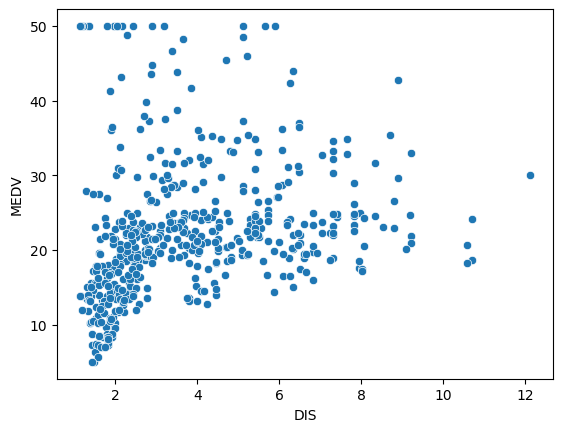

In [16]:
sns.scatterplot(x = boston_df['DIS'], y = boston_df['MEDV'])